# Monte Carlo Method

The Monte Carlo method essentially refers to the techniques which uses computer-generated random number to draw iid (independent and identically distributed) samples from probability distributions.

Suppose we want to calculate an integral
$$I = \int h(x) f(x) \,dx = E(h(X)),$$
where random variable follows a distribution described by a probability density function $X\sim f(x)$.

The Monte Carlo method samples $X_1, X_2, \ldots, X_n \sim f(x)$
and approximates the integral by the sample average
$$
\hat{I} = \dfrac{1}{n} \sum_{i=1}^{n} h(X_i).
$$

By the law of large numbers, we know $\hat{I} \rightarrow I$ as
$$E(\hat{I}) = I, \quad Var(\hat{I}) = \dfrac{Var(h(X))}{n} \xrightarrow{n\rightarrow \infty} 0.$$

This gets around the curse of dimensionality. Here the random variable $X$ can be high dimensional,
but the variance of \hat{I} is just a constant divided by $n$, which has nothing to do with the dimenionality.

The question becomes how do we generate iid samples using computers. It roots to generate uniformly distributed random numbers.

## Pseudorandom number generator

Computers are deterministic. There is no way to generate true random numbers.
In practice, people use algorithms to generate psudorandom numbers,
which appears to be random and uniformly distribution if you don't know the seed.

One of the most common generator is the __linear congruential generator__:

* Given $X_0$ as a seed.
* Iteratively generate $X_{t+1} = aX_t + b \;\textrm{mod}\; M  \in {0, 1, \ldots, M}$.
* Obtain $u_{t+1} = \frac{X_{t+1}}{M} \sim \textrm{unif}[0, 1]$. 

Here $a, b, M$ are some carefully chosen integers; $M$ is chosen to be a large number to avoid the sequence repeating itself too soon.

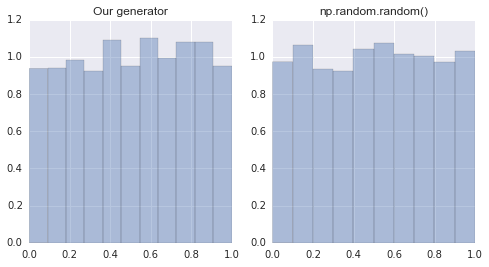

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn

x = 1
u = np.zeros(1000)
a, b, M = 1103515245, 12345, 2**31

for i in xrange(len(u)):
    x_new = (a*x + b) % M
    u[i] = float(x_new) / M
    x = x_new
    
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
# you can also use plt.hist(u),
# here I just want to make it more beatiful.
seaborn.distplot(u, kde=False, norm_hist=True)
plt.title('Our generator')

plt.subplot(1,2,2)
np.random.seed(1)
seaborn.distplot(np.random.random(1000), kde=False, norm_hist=True)
plt.title('np.random.random()')

## Probability density functions

We often say a random variable $X\sim f(x)$, where $f(x)$ is a probability density function. 

### One view

We can think of it a propotion/frequency of how often $X_1, X_2, \ldots X_n$ falls into a bin $(x, x+\Delta x)$ divided by the size of the area $\Delta x$:
$$f(x) = \dfrac{P\left(X \in (x, x+\Delta x)\right)}{\Delta x}.$$

Obviously,
$$\int f(x)\; dx = 1.$$

### Another view

Another way is to think of $f(x)$ a huge population of points $\{x_1, x_2, \ldots, x_m\}$. When we draw a sample $X\sim f(x)$, it is simply a random sample from this population:
$$X \sim \textrm{unif} \{x_1, x_2, \ldots, x_m\}.$$

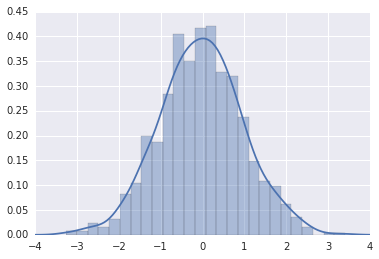

In [37]:
# plots 1000 standard normal samples into bins.
seaborn.distplot(np.random.standard_normal(1000));
plt.xlim([-4,4]);

## Cumulative density function

The cumulative density function is 
$$F(x) = P(X\leq x)= \int_{-\infty}^{x} f(x)\;dx.$$

Conversely, the probability density function is the derivative of the cumulative density function.
$$
f(x) = F'(x) = \dfrac{F(x+\Delta x) - F(x)}{\Delta x} = \dfrac{P\left(X \in (x, x+\Delta x)\right)}{\Delta x}.
$$

This means, when given a percentage $u = F(x)\in [0, 1]$, we can find a percentile $x = F^{-1}(u)$ such that $x\sim f(x)$.

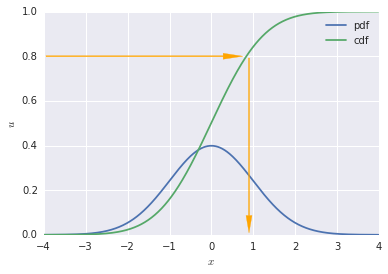

In [96]:
import matplotlib.mlab as mlab

dx = .01
x = np.arange(-4, 4, dx)

# probility density function of N(0, 1)
pdf = mlab.normpdf(x, 0, 1.0)

# cumulative density function
cdf = np.cumsum(pdf*dx)

# plot the curves
plt.plot(x, pdf, label='pdf')
plt.plot(x, cdf, label='cdf')
plt.annotate('', xy=(0.8, 0.8), xytext=(-4, 0.8),
            arrowprops=dict(color='orange', shrink=0.01, width=1, headwidth=6))
plt.annotate('', xy=(0.9, 0), xytext=(0.9, 0.8),
            arrowprops=dict(color='orange', shrink=0.01, width=1, headwidth=6))
plt.ylabel('$u$')
plt.xlabel('$x$')
plt.legend(loc='best');

As shown by the orange arrows in the figure above, to draw a sample $X\sim f(x)$ using the random number generator, we can do the following two steps:
* Generate a random number $u \sim \textrm{unif}[0, 1]$,
* Find out the $x \sim F^{-1}(u)$ by the inverse of CDF function.